<a href="https://colab.research.google.com/github/TomasKricka/MPA-MLF/blob/main/final_project/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project
## MPA-MLF
**Tomas Kricka**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical, plot_model, model_to_dot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.backend import clear_session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
x_train = np.load("/content/drive/My Drive/MLF/final project/x_train_all_4.npy")
x_test =  np.load("/content/drive/My Drive/MLF/final project/x_test_all_4.npy")
y_train = pd.read_csv("/content/drive/My Drive/MLF/Final_dataset/Dataset/y_train.csv")

In [13]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

print(x_train.max())
print(x_test.max())
print(y_train.max())

(3549, 44, 52)
(8279, 44, 52)
(8279, 2)
43007.0
43967.0
id        8278
target       3
dtype: int64


In [28]:
x_test_pred = x_test

clasess = 3

x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.2)
y_train = y_train.drop("id", axis = 1)
y_test = y_test.drop("id", axis = 1)

In [29]:
#x_train_scaled = ((x_train-x_train.min())/(x_train.max()-x_train.min()))
x_train_scaled = x_train.astype('float32') / x_train.max()
y_train = y_train - 1
y_train_encoded = to_categorical(y_train, num_classes=clasess)

In [ ]:
print(y_train_encoded.shape)
print(y_train_encoded)

(6623, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [30]:
model = Sequential()
model.add(Flatten(input_shape=(44, 52)))      
model.add(Dense(1028, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(clasess, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2288)              0         
                                                                 
 dense_11 (Dense)            (None, 1028)              2353092   
                                                                 
 dense_12 (Dense)            (None, 512)               526848    
                                                                 
 dense_13 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 2,881,479
Trainable params: 2,881,479
Non-trainable params: 0
_________________________________________________________________


In [31]:
optimizer = Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [32]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
83/83 [==============================] - 2s 9ms/step - loss: 0.7184 - accuracy: 0.6629 - val_loss: 0.6150 - val_accuracy: 0.7419
Epoch 2/200
83/83 [==============================] - 1s 7ms/step - loss: 0.4026 - accuracy: 0.8435 - val_loss: 0.4539 - val_accuracy: 0.8294
Epoch 3/200
83/83 [==============================] - 1s 7ms/step - loss: 0.3024 - accuracy: 0.8792 - val_loss: 0.3165 - val_accuracy: 0.8785
Epoch 4/200
83/83 [==============================] - 0s 5ms/step - loss: 0.2109 - accuracy: 0.9205 - val_loss: 0.3213 - val_accuracy: 0.8830
Epoch 5/200
83/83 [==============================] - 0s 5ms/step - loss: 0.1899 - accuracy: 0.9283 - val_loss: 0.2068 - val_accuracy: 0.9336
Epoch 6/200
83/83 [==============================] - 0s 5ms/step - loss: 0.1041 - accuracy: 0.9645 - val_loss: 0.1798 - val_accuracy: 0.9366
Epoch 7/200
83/83 [==============================] - 0s 5ms/step - loss: 0.0909 - accuracy: 0.9666 - val_loss: 0.2742 - val_accuracy: 0.9102
Epoch 8/200
8

In [33]:
#x_test_scaled = abs((x_test-x_test.min())/(x_test.max()-x_test.min()))
x_test_scaled = x_test.astype('float32') / x_test.max()
y_test = y_test - 1
y_test_encoded = to_categorical(y_test, num_classes=clasess)

score = model.evaluate(x_test_scaled, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')
print(y_test_encoded.shape)

Test loss: 0.4169486165046692
Test accuracy: 95.28985619544983 %
(1656, 3)


In [34]:
#x_test_pred_scaled = abs((x_test_pred-x_test_pred.min())/(x_test_pred.max()-x_test_pred.min()))
x_test_pred_scaled = x_test_pred.astype('float32') / x_test_pred.max()


pred_val = model.predict([x_test_pred_scaled])

df = pd.DataFrame(pred_val)

row_numb = df.shape[0]

pred_numbs = np.argmax(pred_val, axis=1)
pred_numbs_res = pred_numbs.reshape ((row_numb,1))


print(row_numb)

pred_numbs_res = pred_numbs_res + 1
print(pred_numbs_res)

df = pd.DataFrame(pred_numbs_res)
df.columns = ["target"]
df.to_csv('filename.csv') 
#files.download('filename.csv')



111/111 [==============================] - 0s 2ms/step
3549
[[2]
 [2]
 [1]
 ...
 [1]
 [1]
 [1]]


In [35]:
from google.colab import files


files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

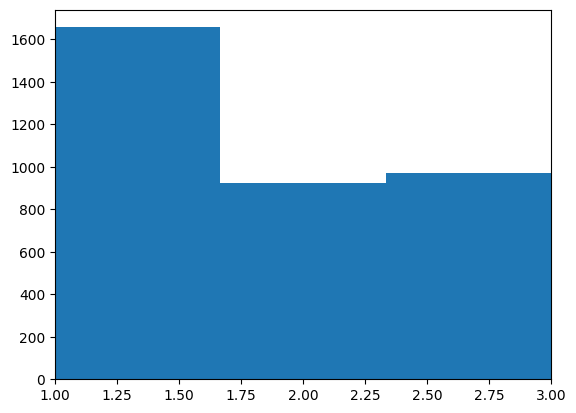

In [36]:
plt.figure()
plt.hist(pred_numbs_res, bins=3)
plt.xlim([1,3])
plt.show()

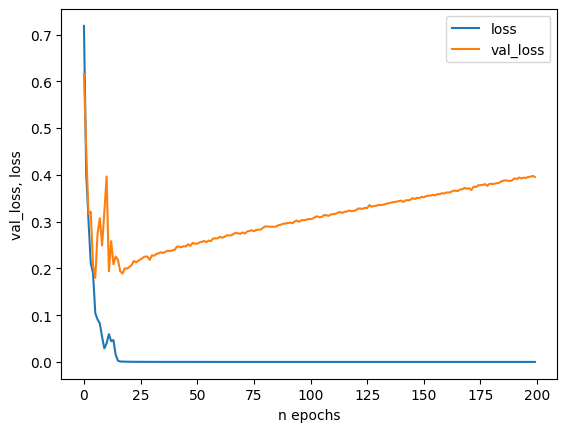

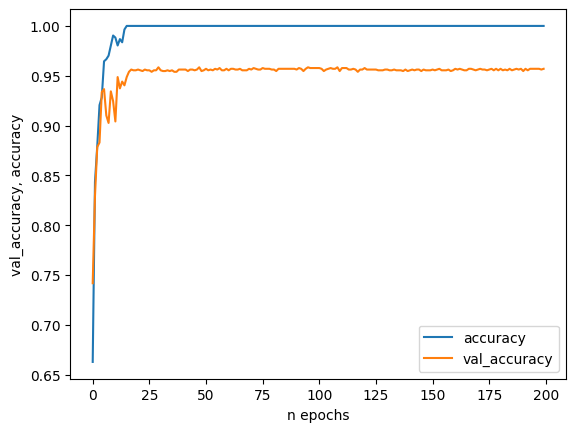

In [37]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper right")
plt.xlabel('n epochs')
plt.ylabel('val_loss, loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="lower right")
plt.xlabel('n epochs')
plt.ylabel('val_accuracy, accuracy')
plt.show()